In [323]:
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
tips = sns.load_dataset('tips')
#自带数据库，要翻墙！

Distribution Plots

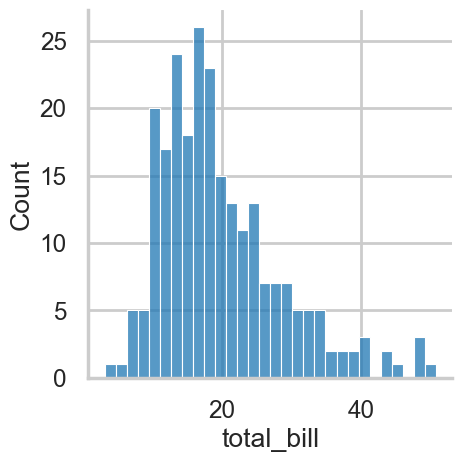

In [324]:
sns.displot(tips['total_bill'],bins=30) #调整竖条数量

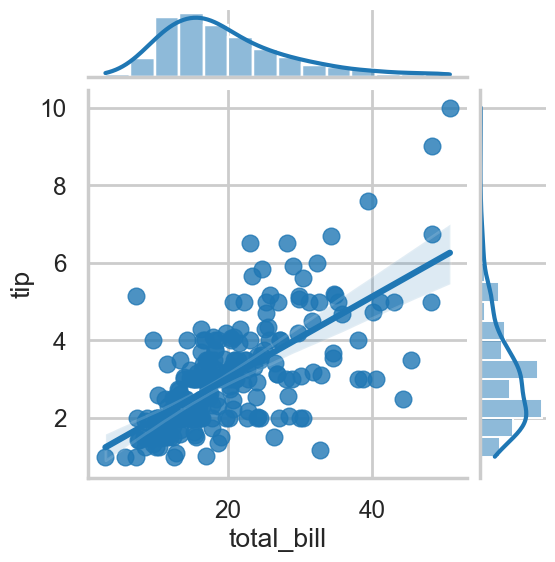

In [325]:
#combine 2 distribution plots
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')  #默认scatter，可以改为hex,reg(拟合线),kde


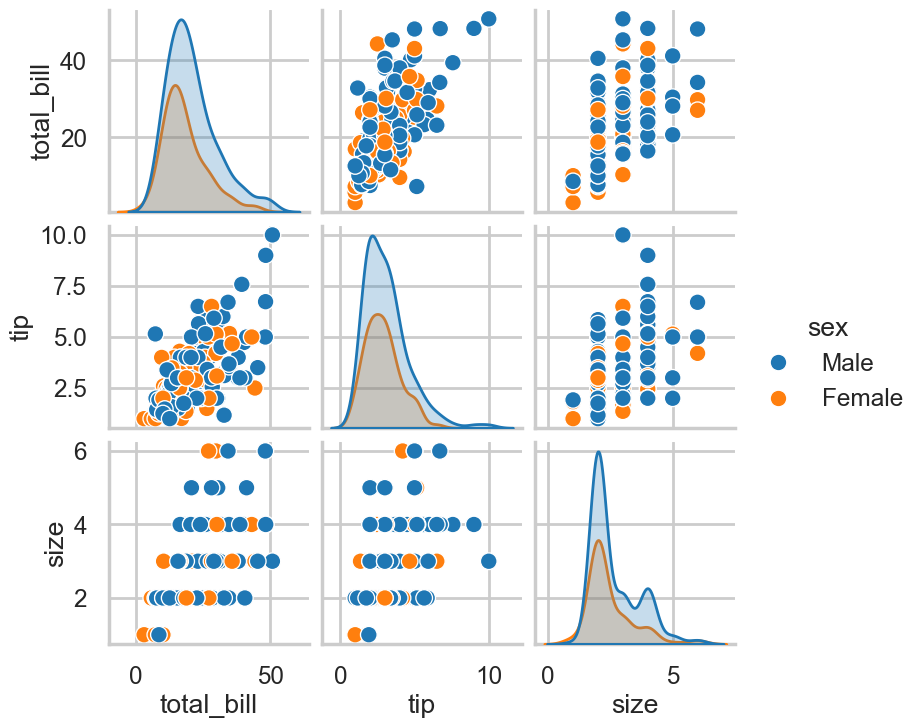

In [326]:
sns.pairplot(tips,hue='sex')   #hue特地标出了某个可分类变量的数量
#对每个数据组合都jointplot

<Axes: xlabel='total_bill'>

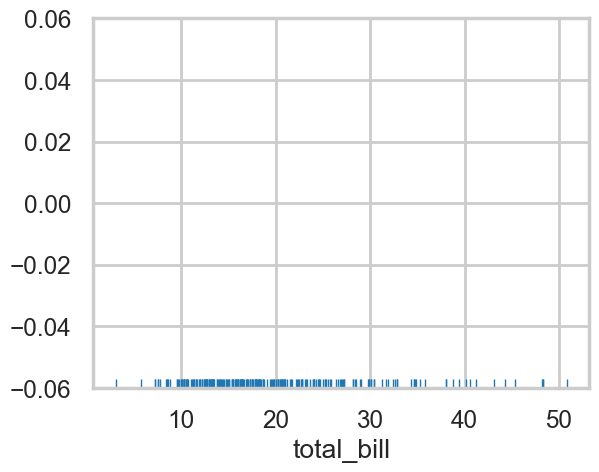

In [327]:
sns.rugplot(tips['total_bill'])

Categorical Plots

<Axes: xlabel='sex', ylabel='total_bill'>

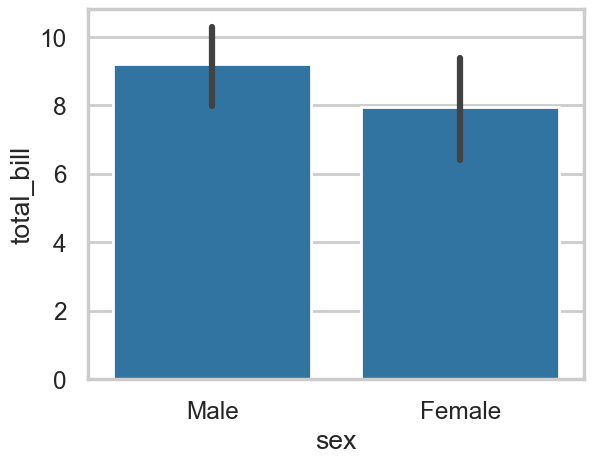

In [328]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std) #默认为平均值,estimator可更改为其他指标,例如numpy中的方差等

<Axes: xlabel='sex', ylabel='count'>

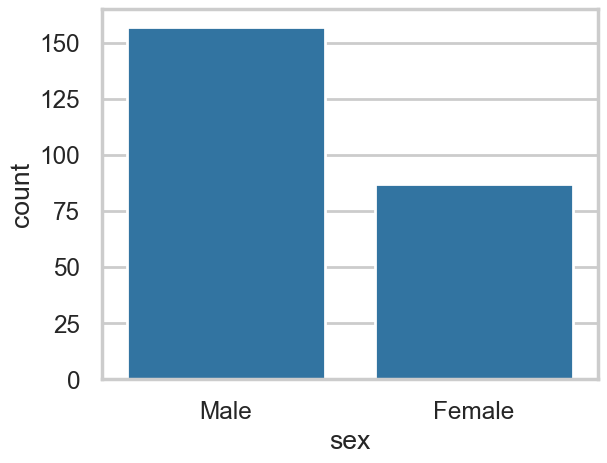

In [329]:
sns.countplot(x='sex',data=tips) #计数

<Axes: xlabel='day', ylabel='total_bill'>

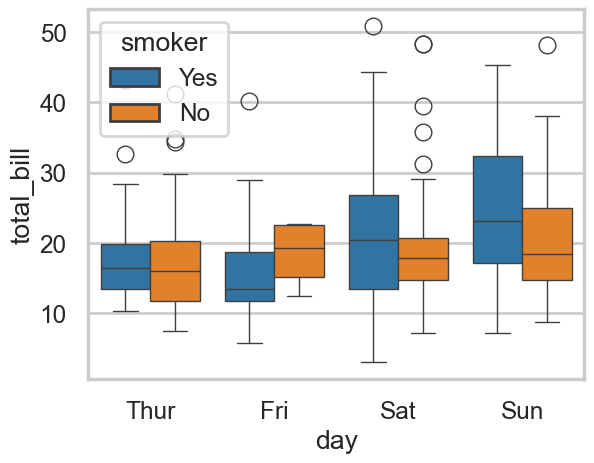

In [330]:
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')  #hue是新的一层分类指标

<Axes: xlabel='day', ylabel='total_bill'>

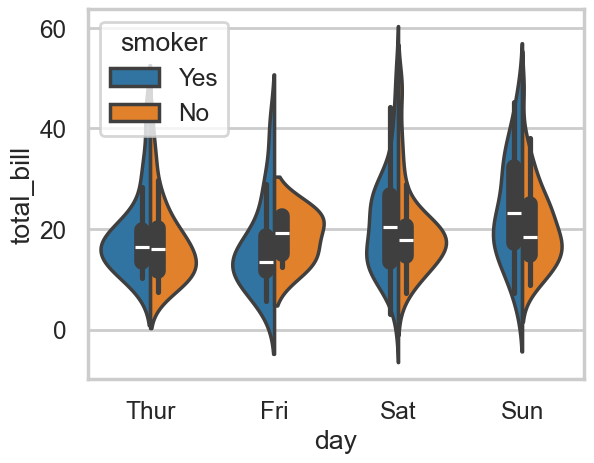

In [331]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='smoker',split=True) #和箱子图类似，越多越宽，more readable
#split用于看

<Axes: xlabel='day', ylabel='total_bill'>

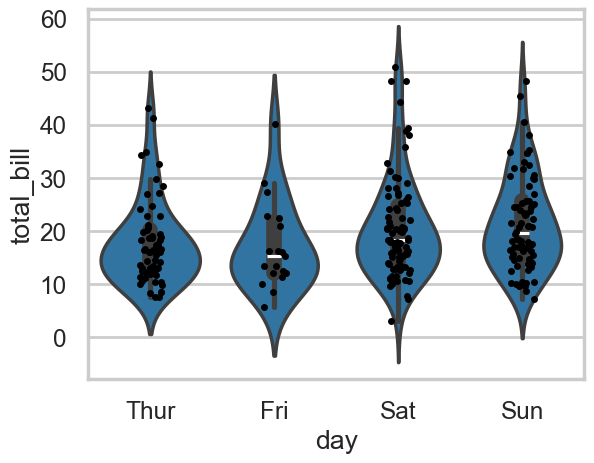

In [332]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,color='black')
sns.violinplot(x='day',y='total_bill',data=tips)
#散点+violin混合技能

C:\Users\johnn\AppData\Local\Temp\ipykernel_19104\3421470817.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.swarmplot(x='day',y='total_bill',data=tips,hue='sex',color='black')


<Axes: xlabel='day', ylabel='total_bill'>

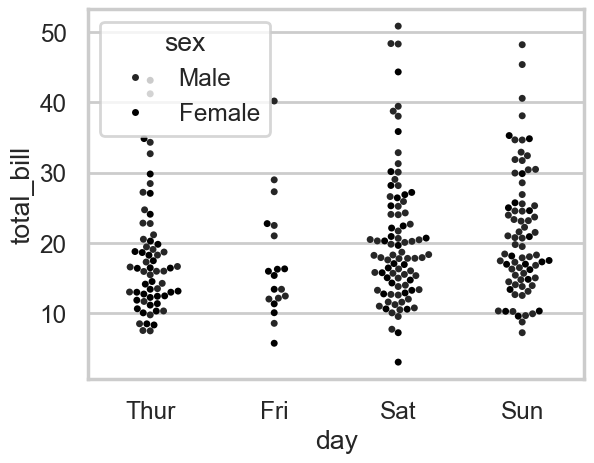

In [333]:
sns.swarmplot(x='day',y='total_bill',data=tips,hue='sex',color='black')
#散点+宽度，适合小范围数据，并且可能可读性低

Matrix Plots

In [334]:
flights = sns.load_dataset('flights')
#自带第二个
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<Axes: >

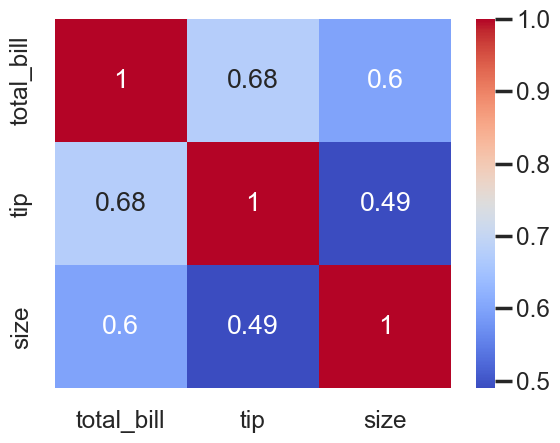

In [335]:
tc=tips.corr(numeric_only=True)
sns.heatmap(tc,annot=True,cmap='coolwarm')  #annot用于显示数字,cmap用于调整颜色
#相关系数矩阵图

<Axes: xlabel='year', ylabel='month'>

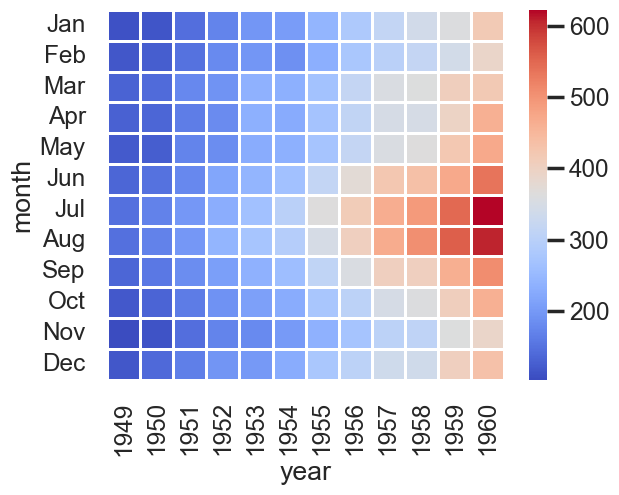

In [336]:
fp = flights.pivot_table(index='month',columns='year',values='passengers')
#矩阵数量图
sns.heatmap(fp,cmap='coolwarm',linecolor='white',linewidths=1) #设置矩阵块之间的东西

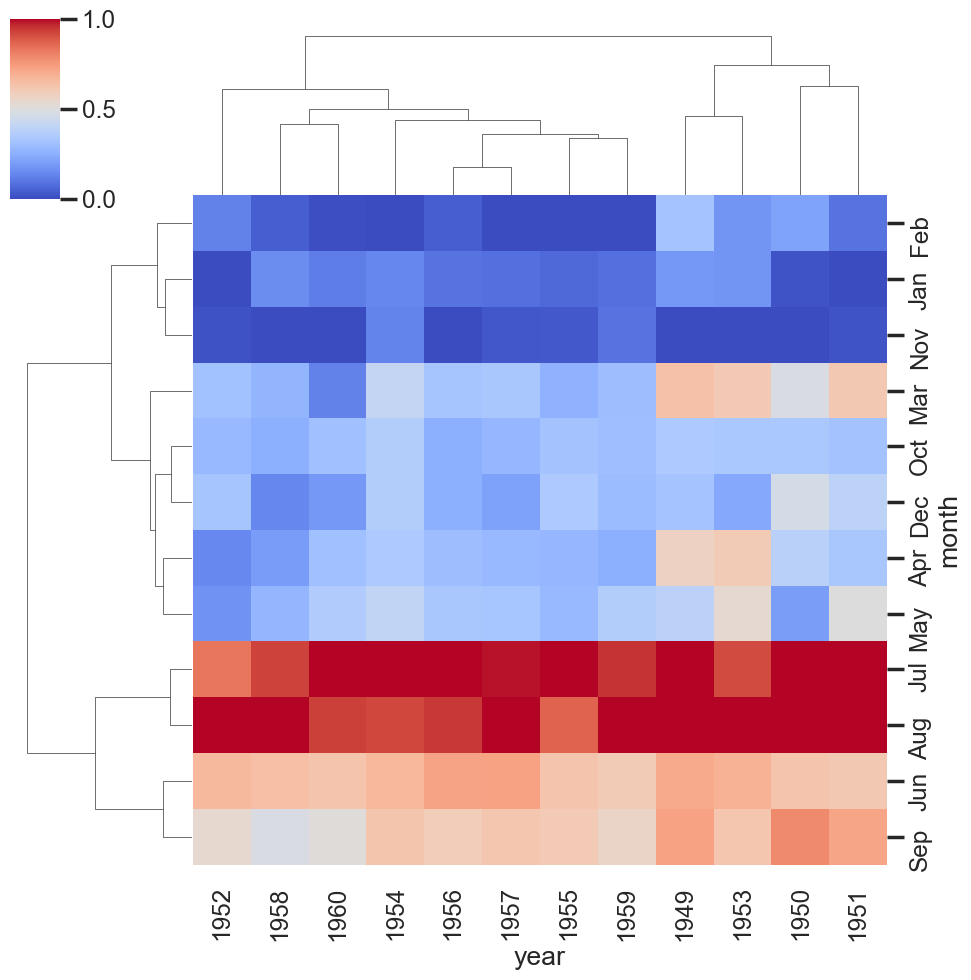

In [337]:
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)     #顺序变化，最接近的在一起

Grids

In [338]:
iris = sns.load_dataset('iris')
iris.head()
#关于花的自带数据，3种

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\Users\johnn\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
C:\Users\johnn\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



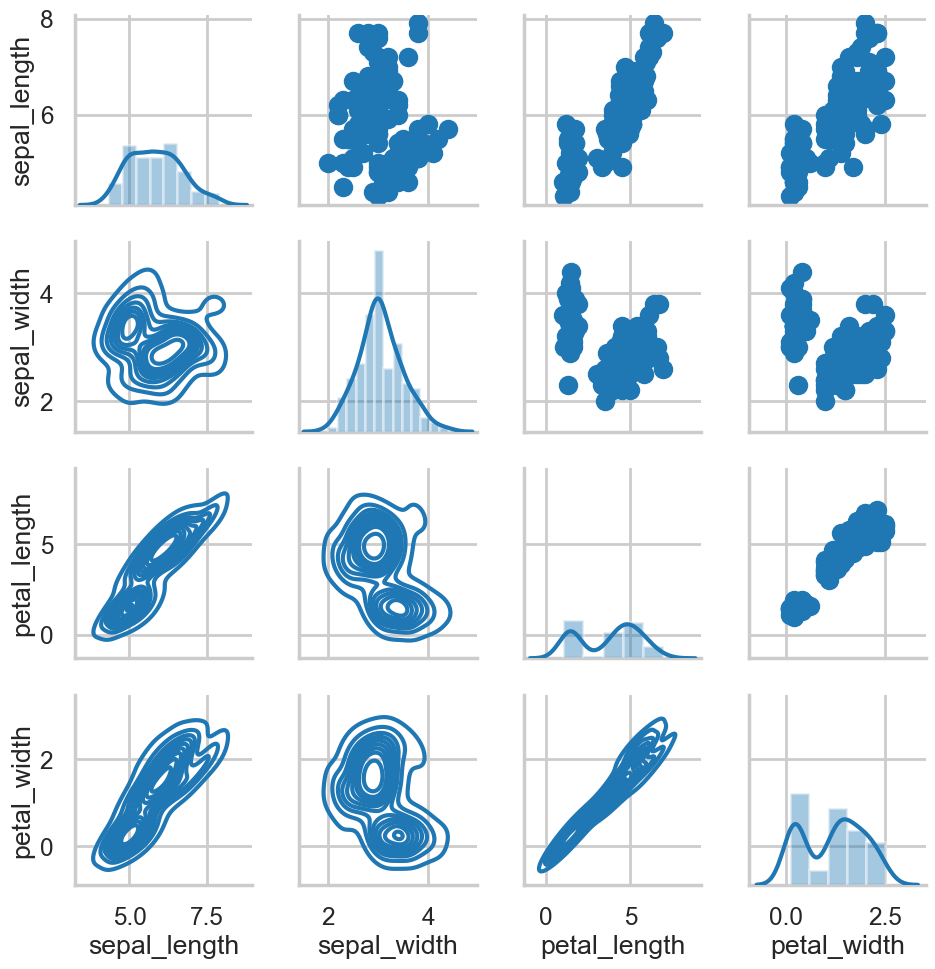

In [339]:
grid = sns.PairGrid(iris)    #更多个性空间
grid.map_diag(sns.distplot)     #斜
grid.map_upper(plt.scatter)    #斜上
grid.map_lower(sns.kdeplot)

C:\Users\johnn\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\johnn\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kw

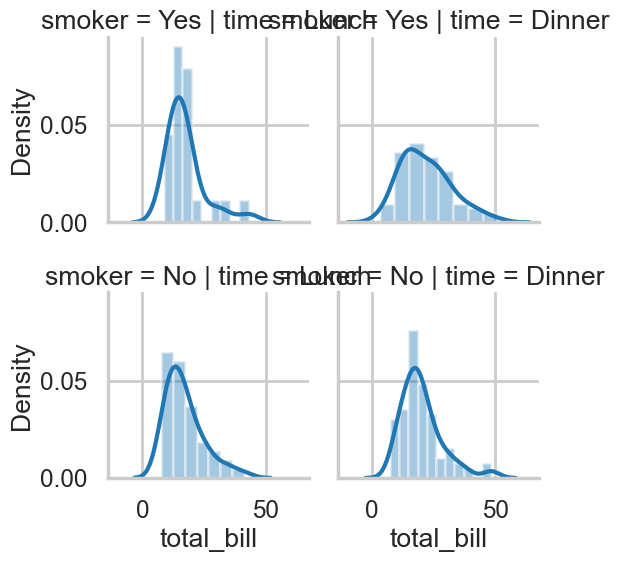

In [340]:
tips = sns.load_dataset('tips')
g = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(sns.distplot,'total_bill')  #distplot将要坏掉，但是displot显示有问题

Regression Plots

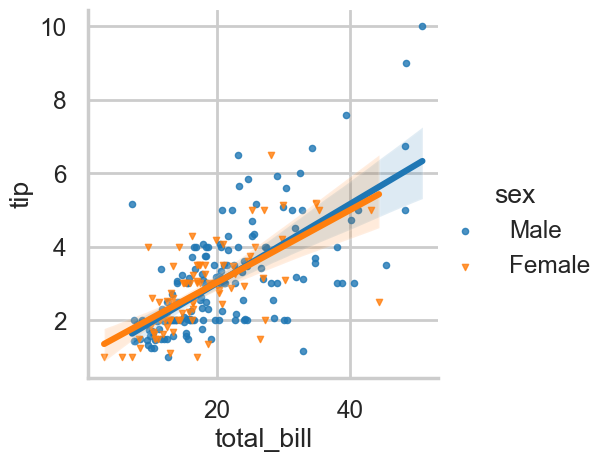

In [341]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'],
           scatter_kws={'s':20})  
#按照hue给出两条线
#markers种类可查,marker大小见后,不会那么个性化

In [342]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex',row='time',aspect=0.6,size=8)
#区别于hue，产出两张图，按照col和row分开，和facetgrid类似

TypeError: lmplot() got an unexpected keyword argument 'size'

Style and Coloer

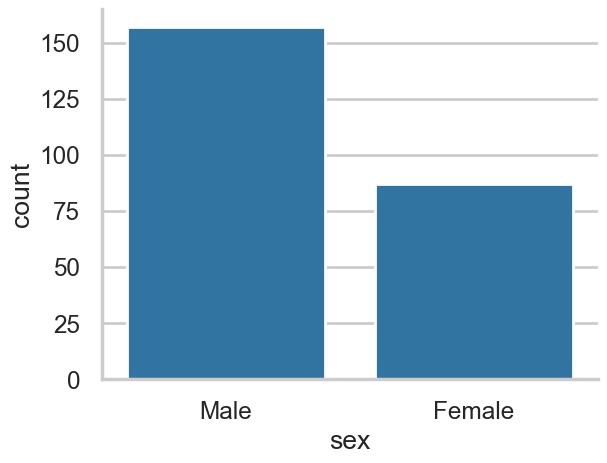

In [343]:
#sns.set_context('poster',font_scale=0.8)   #设置默认格式（包括paper等）
sns.set_style('whitegrid')  #设置背景
sns.countplot(x='sex',data=tips)
sns.despine()  #去除上和右侧的边界


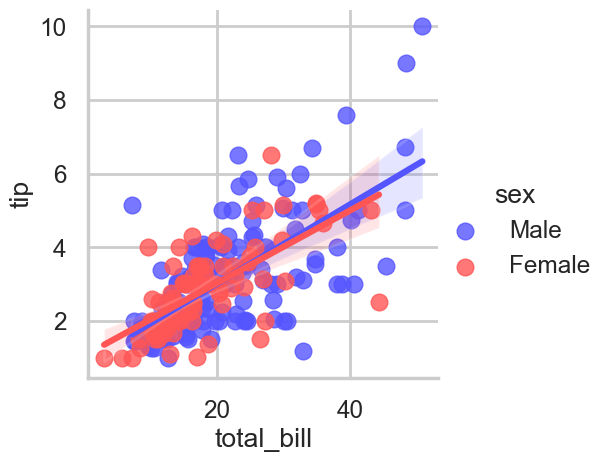

In [345]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='seismic')
#palette:matplotlib上搜索colormap有很多